In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
plt.rcParams['figure.figsize'] = (17.0, 7.0)
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams["axes.labelsize"] = 13
plt.rcParams["axes.labelweight"] = 'bold'
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

In [2]:
checkout_data = pd.read_excel("/home/pranav/Documents/notebooks/EECS731/PranavFY13-FY16BkCircs.xlsx")
bib_data = pd.read_excel("/home/pranav/Documents/notebooks/EECS731/PranavFY13-FY16BibInfo.xlsx")
location_data = pd.read_excel("/home/pranav/Documents/notebooks/EECS731/PranavVoyLocCodes.xlsx")

In [3]:
genre_name = dict()
genre_name['A'] = 'GENERAL WORKS'
genre_name['B'] = 'PHILOSOPHY,PSYCHOLOGY,RELIGION'
genre_name['C'] = 'AUXILIARY SCIENCES OF HISTORY'
genre_name['D'] = 'WORLD HISTORY'
genre_name['E'] = 'HISTORY OF THE AMERICAS'
genre_name['F'] = 'HISTORY OF THE AMERICAS(F)'
genre_name['G'] = 'GEOGRAPHY,ANTHROPOLOGY,RECREATION'
genre_name['H'] = 'SOCIAL SCIENCES'
genre_name['J'] = 'POLITICAL SCIENCE'
genre_name['K'] = 'LAW'
genre_name['L'] = 'EDUCATION'
genre_name['M'] = 'MUSIC'
genre_name['N'] = 'FINE ARTS'
genre_name['P'] = 'LANGUAGE AND LITERATURE'
genre_name['Q'] = 'SCIENCE'
genre_name['R'] = 'MEDICINE'
genre_name['S'] = 'AGRICULTURE'
genre_name['T'] = 'TECHNOLOGY'
genre_name['U'] = 'MILITARY SCIENCE'
genre_name['V'] = 'NAVAL SCIENCE'
genre_name['Z'] = 'BIBLIOGRAPHY,LIBRARY SCIENCE,INFORMATION RESOURCES'
genre_name['HUMAN'] = 'HUMAN'
genre_name['DISS'] = 'DISSERTATION'
genre_name['BRIEF'] = 'BRIEF'

In [4]:
merged_df = checkout_data.merge(bib_data,how='left',left_on='ITEM_ID',right_on='Item_ID').drop('Item_ID',axis=1)

In [5]:
merged_df.head()

,ITEM_ID,PATRON_GROUP_ID,CHARGE_DATE,CHARGE_LOCATION,Title,PermLoc,Author,Imprint,Pub_date,ISBN,NormalizedCallNo,DisplayCallNo,RecallTotal
0,1205347,faculty,2012-07-05 17:51:59,-Watson Circ Desk,Esthetics contemporary / edited by Richard Kos...,151.0,NaN,"Buffalo, N.Y. : Prometheus Books, 1989.",1989.,087975480X :,BH 201 E 84 1989,BH201 .E84 1989,0.0
1,4878014,faculty,2012-07-05 18:11:30,-Anschutz Circ Desk,Universal methods of design : 100 ways to rese...,3.0,"Martin, Bella.","Beverly, MA : Rockport Publishers, 2012.",2012.,9781592537563,Q 18055 M 4 M 357 2012,Q180.55.M4 M357 2012,0.0
2,2187229,faculty,2012-07-05 18:11:36,-Anschutz Circ Desk,"How to see / U.S. Department of Health, Educat...",90.0,"Nelson, George.","[Washington] : U.S. Dept. of Health, Education...",1973.,NaN,HE 3 2 SE 3,HE 3.2:Se 3,0.0
3,4839588,proxy.fac,2012-07-06 15:53:48,-Art Circulation Desk,"Original intentions : essays on production, re...",27.0,NaN,"Gainesville, FL : University Press of Florida,...",c2012.,9780813039725 (alk. paper),NK 1068 O 75 2012,folio NK1068 .O75 2012,0.0
4,4368100,faculty,2012-07-07 16:44:18,-Watson Circ Desk,Companion to aesthetics : edited by Stephen Da...,151.0,NaN,"Chichester, U.K. ; Malden, MA : Wiley-Blackwel...",2009.,9781405169226 (hardcover : alk. paper),BH 56 C 65 2009,BH56 .C65 2009,0.0


In [6]:
data = merged_df.merge(location_data,how='left',left_on='PermLoc',right_on='LOCATION_ID').drop('PermLoc',axis=1)

In [7]:
data['CHARGE_DATE'] = pd.to_datetime(data['CHARGE_DATE'])
data['year'] = data['CHARGE_DATE'].map(lambda x : x.year)
data['month'] = data['CHARGE_DATE'].map(lambda x : x.month)
data['day'] = data['CHARGE_DATE'].map(lambda x : x.day)
data['Day_of_week'] = data['CHARGE_DATE'].map(lambda x: x.weekday())
data['quarter'] = data['CHARGE_DATE'].map(lambda x: x.quarter)
data['Weekday'] = data['Day_of_week'].map(lambda x: 0 if x<5 else 1)
data['week'] = data['CHARGE_DATE'].map(lambda x: x.week)
def semester(month):
    if month < 6 :
        return 1
    elif month > 5 and month < 9:
        return 2
    else:
        return 3
data['semester'] = data['month'].map(lambda x : semester(x))

In [8]:
black_list = ['PERSONAL','ANSCHUTZ','WATSON','HEADPHONE','MUSIC','PHOTOCOPY:','TECH','THESIS','CENSUS',
              'SERIAL','PROJECT','CHILDREN','STONE-FERRIER','GRIFFITH','PERSOANL','FOLIO','SPAHR','C22669','DEMCO',
             'VIDEO','PREX','C22669','B12691','OECD','B16267','C22866','E3373','TK48','LC1023','DISS1993','C22667',
             'B16924', 'B16914', 'C23933', 'C23929', 'B16933','C23938','C23928','B16941','B16919','B16936','B16938',
              'B16939','B16943','B16940','A281','C23937','B16942','B16917','A866','B16931','B16927','B16932','C23935',
              'C23930','B16937','B16925','B16928','B16935','B16916','B16913','C23936','B16929','B16915','B16918',
              'B16934','B16930']

In [9]:
data['NormalizedCallNo'] = data.NormalizedCallNo.fillna('NA')
data['genre_code'] = data['NormalizedCallNo'].map(lambda x : x[0] if x.split(' ')[0] not in 
                                                            ['BRIEF','HUMAN','DISS'] else x.split(' ')[0])
white_list = set()
for val in data.genre_code.value_counts().index:
    try:
        float(val)
    except ValueError:
        if val not in black_list:
            white_list.add(val)
data = data[data.genre_code.isin(white_list)]
data['genre_name'] = data.genre_code.map(lambda x : genre_name.get(x))

In [15]:
for col in data.columns:
    print "Column Name:"+col
    print "Missing Values: " + str(((len(data) - len(data[col].dropna()))/float(len(data)))*100.0)+"%\n"

Column Name:ITEM_ID
Missing Values: 0.0%

Column Name:PATRON_GROUP_ID
Missing Values: 0.0%

Column Name:CHARGE_DATE
Missing Values: 0.0%

Column Name:CHARGE_LOCATION
Missing Values: 0.0%

Column Name:Title
Missing Values: 0.0%

Column Name:Author
Missing Values: 25.680494053%

Column Name:Imprint
Missing Values: 9.49066586357%

Column Name:Pub_date
Missing Values: 9.58714897066%

Column Name:ISBN
Missing Values: 25.7695410825%

Column Name:NormalizedCallNo
Missing Values: 0.0%

Column Name:DisplayCallNo
Missing Values: 0.0459177792898%

Column Name:RecallTotal
Missing Values: 0.026769879424%

Column Name:LOCATION_ID
Missing Values: 0.026769879424%

Column Name:LOCATION_CODE
Missing Values: 0.026769879424%

Column Name:year
Missing Values: 0.0%

Column Name:month
Missing Values: 0.0%

Column Name:day
Missing Values: 0.0%

Column Name:Day_of_week
Missing Values: 0.0%

Column Name:quarter
Missing Values: 0.0%

Column Name:Weekday
Missing Values: 0.0%

Column Name:week
Missing Values: 0.0%

<h3>UNIVARIATE ANALYSIS

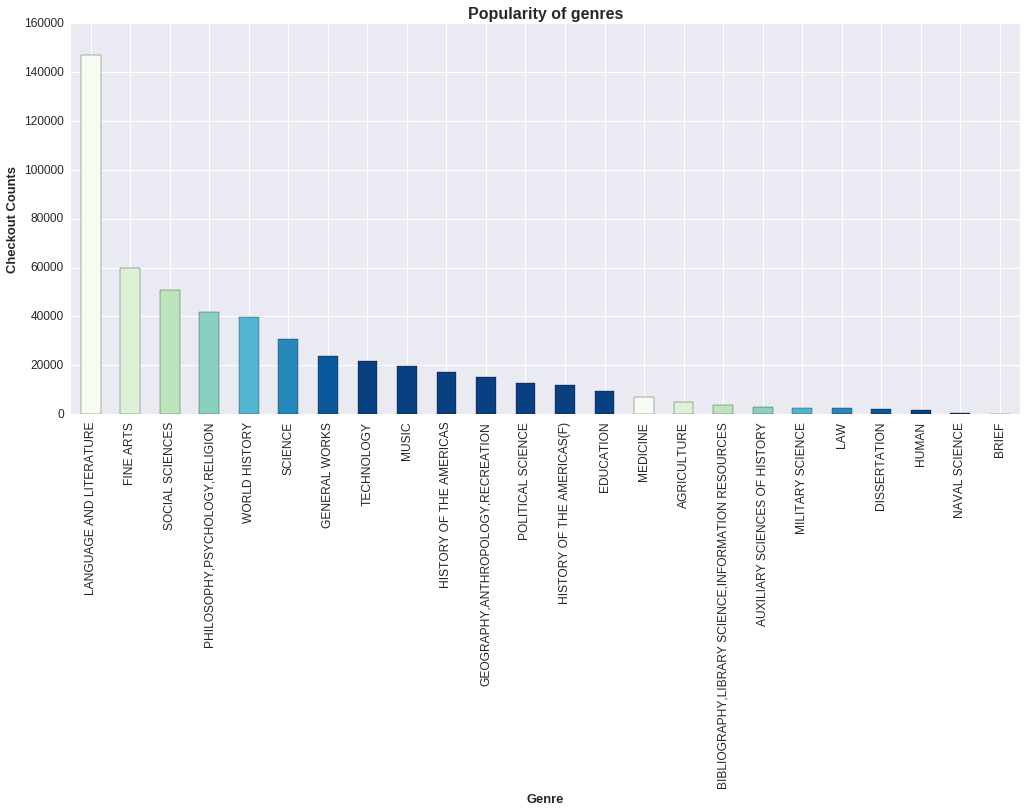

In [16]:
colors = plt.cm.GnBu(np.linspace(0, 2, 14))
data.genre_name.value_counts().plot.bar(color=colors)
plt.xlabel("Genre")
plt.xticks(rotation=90)
plt.ylabel("Checkout Counts")
plt.title("Popularity of genres")
plt.show()

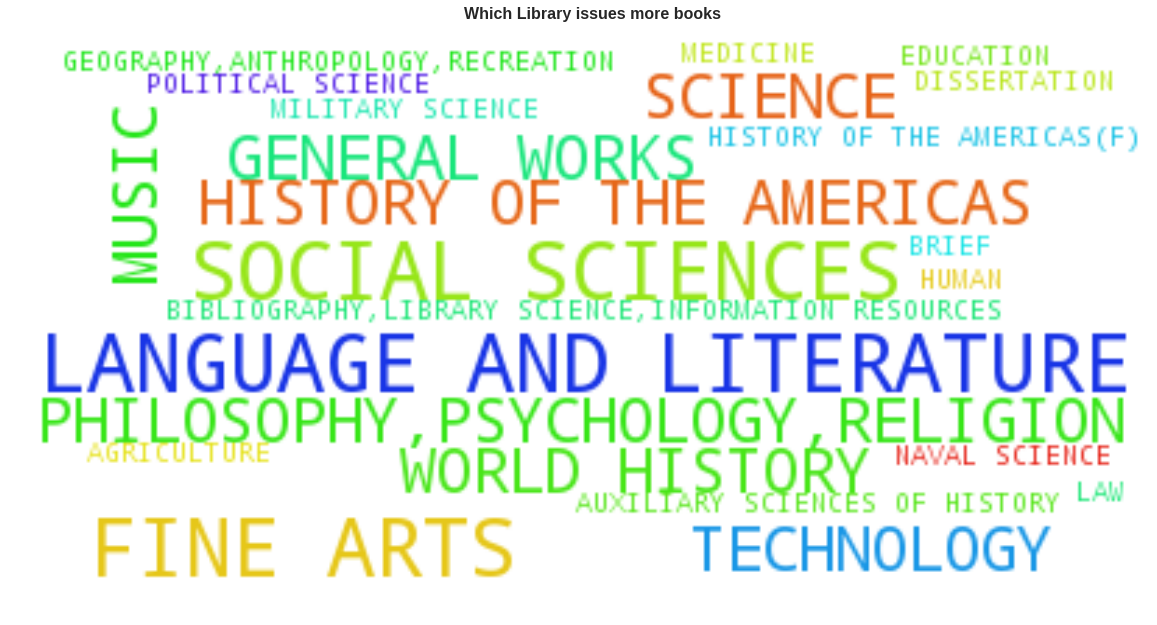

In [25]:
plt.figure(figsize=(20,15))
plt.imshow(WordCloud(background_color="white").generate_from_frequencies(data.genre_name.value_counts().
                                                                         reset_index().values).recolor())
plt.title("Which Library issues more books\n")
plt.axis('off')
plt.show()

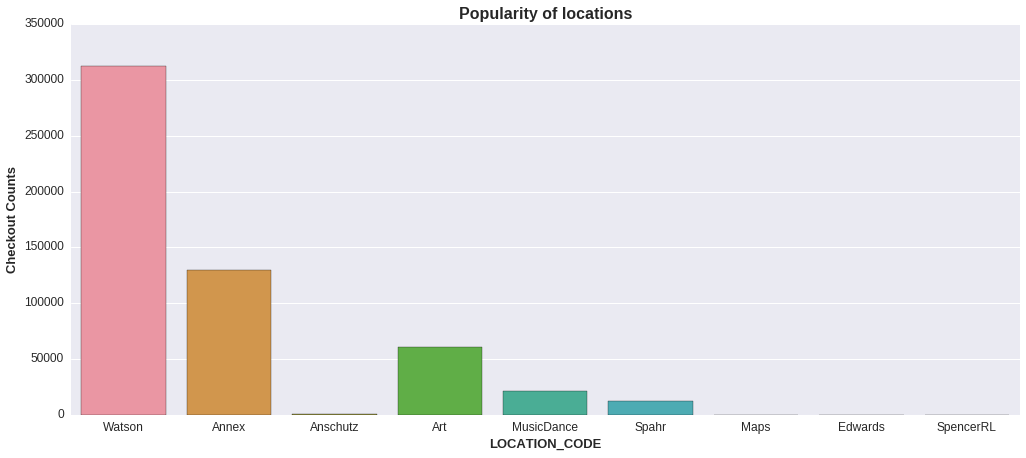

In [26]:
sns.countplot(data.LOCATION_CODE)
plt.ylabel("Checkout Counts")
plt.title("Popularity of locations")
plt.show()

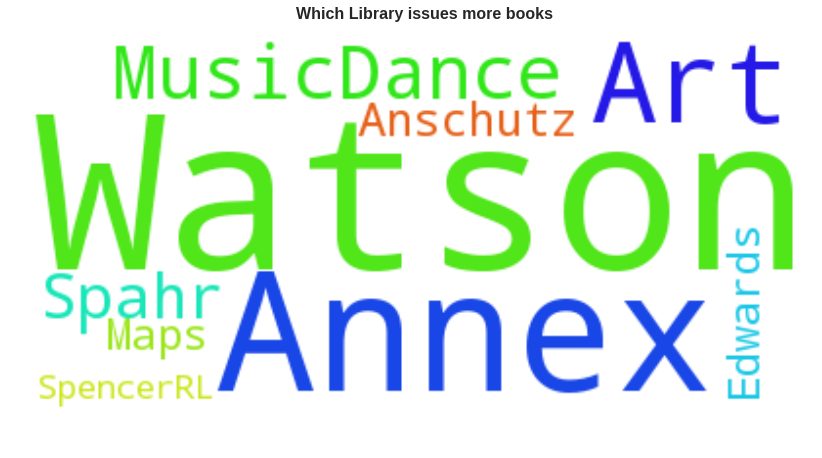

In [29]:
plt.imshow(WordCloud(background_color="white").generate_from_frequencies(data.LOCATION_CODE.value_counts().
                                                                         reset_index().values).recolor())
plt.title("Which Library issues more books\n")
plt.axis('off')
plt.show()

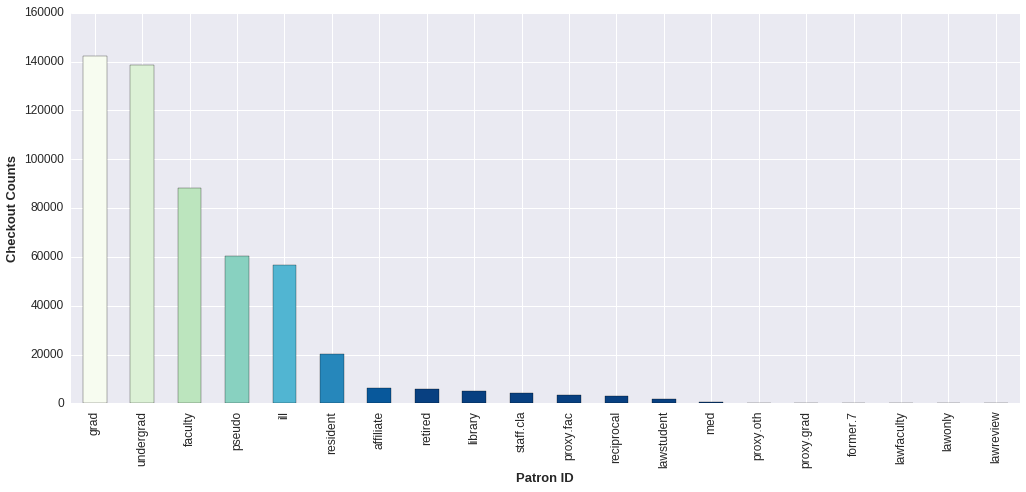

In [30]:
colors = plt.cm.GnBu(np.linspace(0, 2, 14))
data.PATRON_GROUP_ID.value_counts().plot.bar(color=colors)
plt.xticks(rotation=90)
plt.ylabel("Checkout Counts")
plt.xlabel("Patron ID")
plt.show()

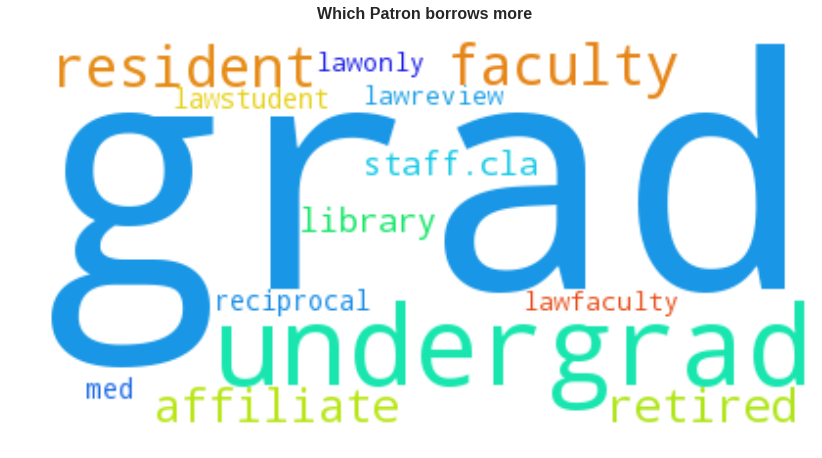

In [32]:
stopwords = {'former.7','ill','pseudo','proxy.fac','proxy.grad','proxy.oth'}
cloud = WordCloud(background_color="white")
word_cloud = cloud.generate_from_frequencies(
    data[~data['PATRON_GROUP_ID'].isin(stopwords)]['PATRON_GROUP_ID'].value_counts().reset_index().values)
plt.imshow(cloud)
plt.title("Which Patron borrows more\n")
plt.axis('off')
plt.show()

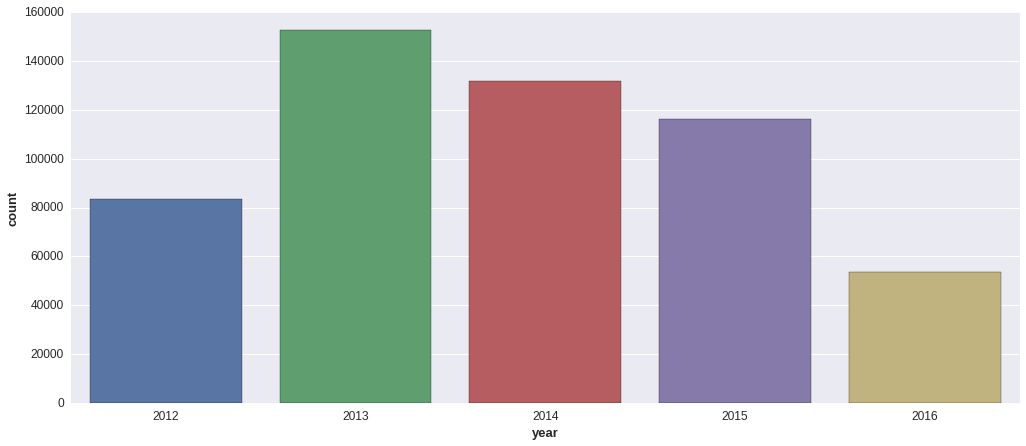

In [33]:
sns.countplot(data.year)
plt.show()

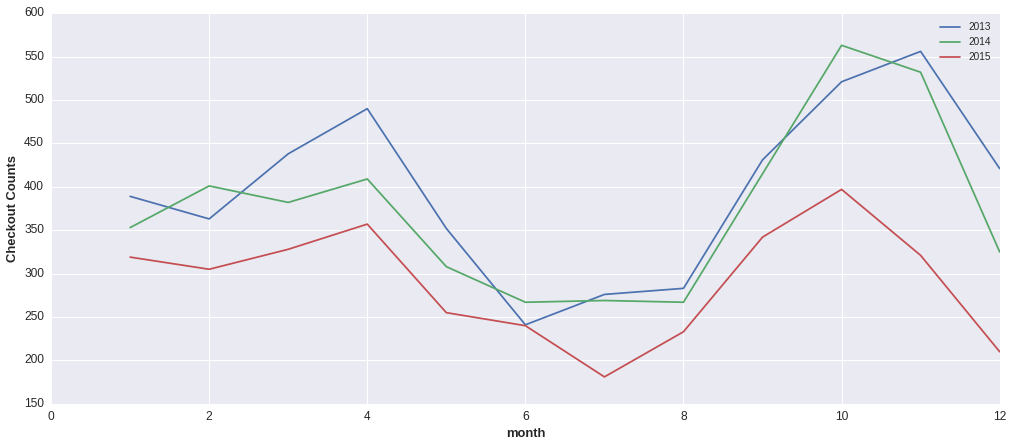

In [35]:
for year in range(2013,2016,1):
    plt.plot(data[(data.year == year) & (data.genre_code == 'E')]['month'].value_counts().sort_index())
plt.legend(range(2013,2016,1))
plt.xlabel("month")
plt.ylabel("Checkout Counts")
plt.show()

<h3> MULTIVARIATE ANALYSIS

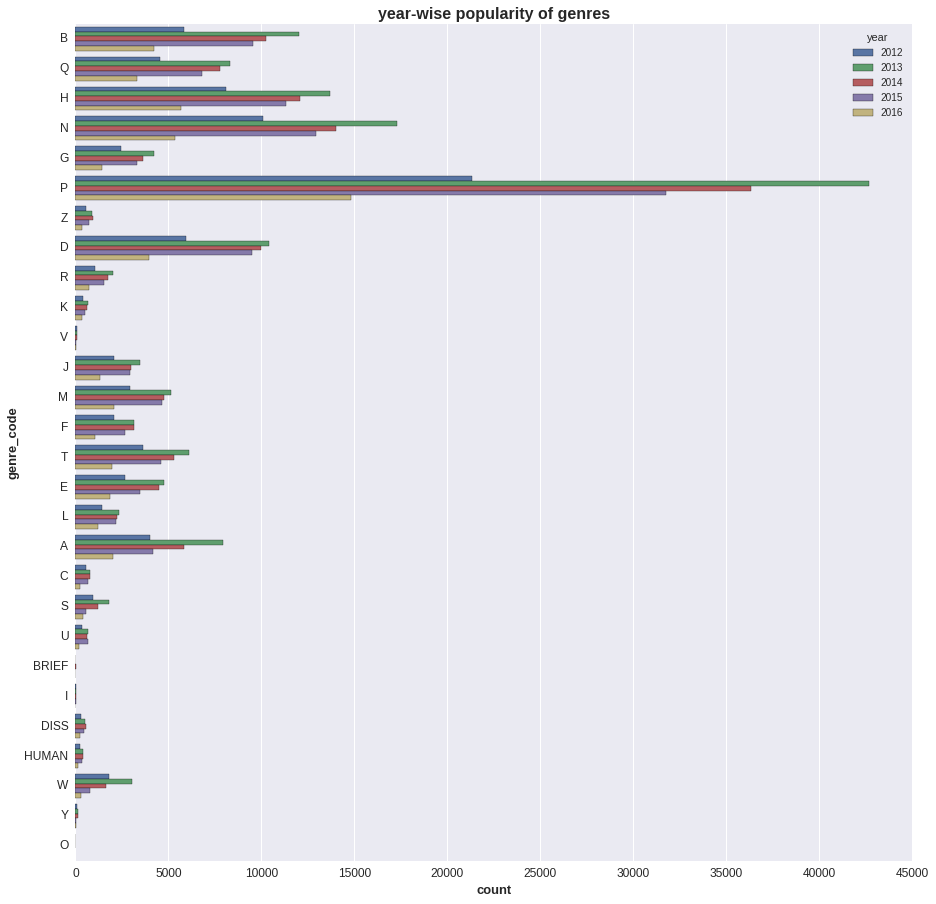

In [36]:
plt.figure(figsize=(15,15))
sns.countplot(data=data,y='genre_code',hue='year')
plt.title("year-wise popularity of genres")
plt.show()

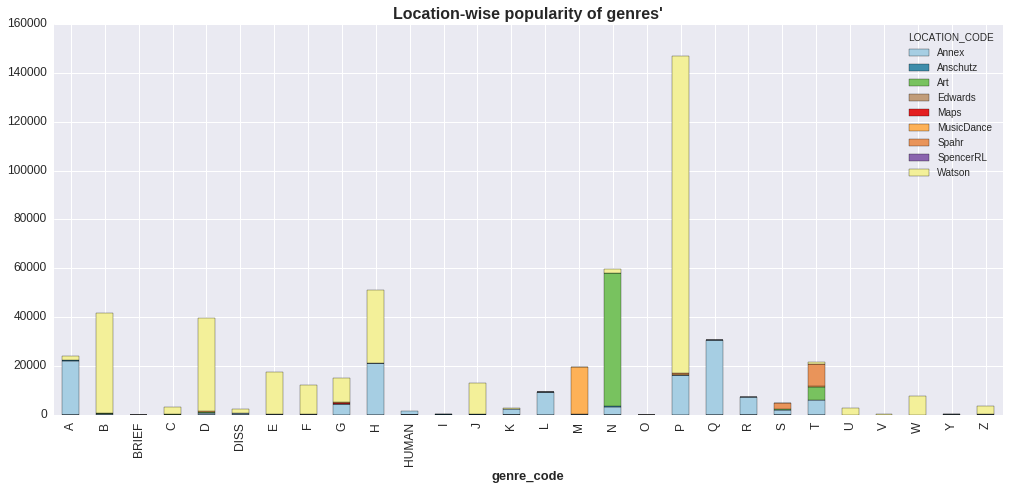

In [37]:
colors = plt.cm.Paired(np.linspace(0, 0.9, 9))
pd.DataFrame(data.groupby(['LOCATION_CODE','genre_code']).size().unstack(0)).plot.bar(stacked=True,color=colors)
plt.title("Location-wise popularity of genres'")
plt.show()

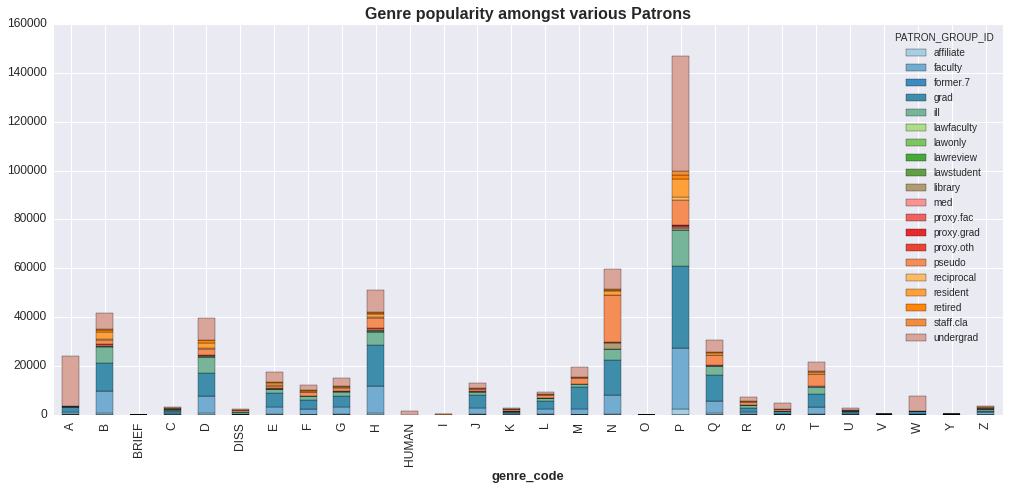

In [38]:
colors = plt.cm.Paired(np.linspace(0, 0.7, 20))
pd.DataFrame(data.groupby(['PATRON_GROUP_ID','genre_code']).size().unstack(0)).plot.bar(stacked=True,color=colors)
plt.title("Genre popularity amongst various Patrons")
plt.show()

In [14]:
modeling_data = pd.DataFrame(data.groupby('CHARGE_DATE').size().resample('W', how='sum'))
modeling_data.columns = ["Books_issued"]

/home/pranav/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


In [15]:
modeling_data.head(20)

,Books_issued
CHARGE_DATE,
2012-07-01,67
2012-07-08,1860
2012-07-15,2241
2012-07-22,2066
2012-07-29,2119
2012-08-05,665
2012-08-12,2337
2012-08-19,2227
2012-08-26,3593


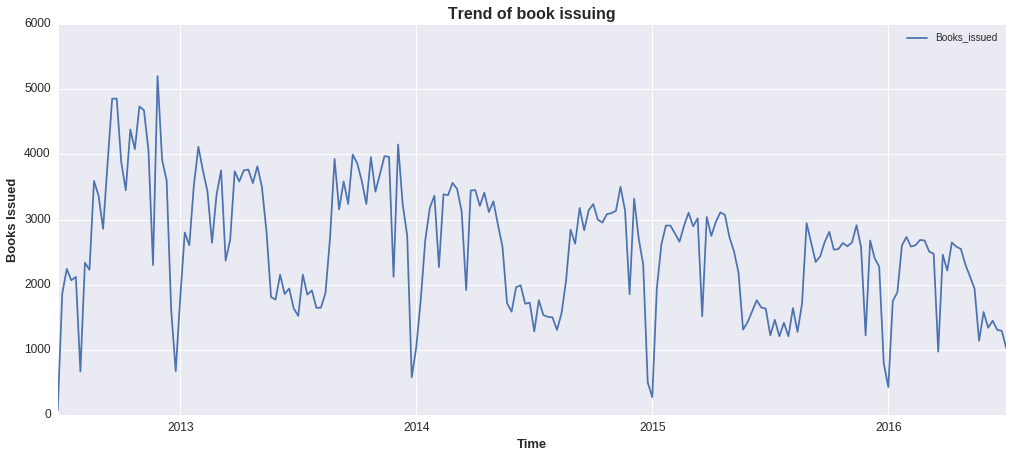

In [40]:
modeling_data.plot()
plt.title("Trend of book issuing")
plt.xlabel("Time")
plt.ylabel("Books Issued")
plt.show()